In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# 시각화 한글폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
style='darkgrid')  

# 경고 제거 코드
import warnings
warnings.filterwarnings("ignore")

In [49]:
data = pd.read_csv('분석전체데이터.csv', encoding = 'cp949')

In [50]:
data

,지원센터코드,지원센터주소,년,접수금액,제공금액,인수금액,이관금액,이용자수,장부금액,장부수량,기부자수,기부건수,제공건수,사업장유형
0,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2017,15793689.0,11343949.0,83229216,0,402,15793689.0,3436,69,257,2013,0
1,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2019,15541100.0,298169210.3,244801019,0,3056,15541100.0,4614,16,28,6325,0
2,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2020,22418200.0,296911934.2,403720010,29574802,3047,22418200.0,11805,17,45,6000,0
3,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2021,36664120.0,299588655.2,286793058,1276000,2645,36664120.0,20718,30,62,8461,0
4,강서구기초푸드뱅크,부산 강서구 명지동,2017,170673867.0,174608378.4,93608722,0,2815,170673867.0,70375,206,1948,25289,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,해운대기초푸드마켓,부산광역시 해운대구 재반로 79(재송동),2021,423550224.0,413706176.5,86349843,49375954,7875,423550224.0,105002,217,803,30636,1
121,해운대기초푸드뱅크,부산 해운대구 재송1동,2017,251652753.0,299552303.0,47899536,0,985,251652753.0,137557,162,3197,10156,1
122,해운대기초푸드뱅크,부산 해운대구 재송1동,2019,369710065.0,407069506.7,46655561,9296136,1184,369710065.0,174470,224,4793,16249,1
123,해운대기초푸드뱅크,부산 해운대구 재송1동,2020,542049942.0,667062331.4,139893506,10900000,327,542049942.0,175586,278,4876,5969,1


In [51]:
data.drop(['지원센터코드','지원센터주소', '지원센터주소', '년'], axis = 1, inplace = True)

In [52]:
data

,접수금액,제공금액,인수금액,이관금액,이용자수,장부금액,장부수량,기부자수,기부건수,제공건수,사업장유형
0,15793689.0,11343949.0,83229216,0,402,15793689.0,3436,69,257,2013,0
1,15541100.0,298169210.3,244801019,0,3056,15541100.0,4614,16,28,6325,0
2,22418200.0,296911934.2,403720010,29574802,3047,22418200.0,11805,17,45,6000,0
3,36664120.0,299588655.2,286793058,1276000,2645,36664120.0,20718,30,62,8461,0
4,170673867.0,174608378.4,93608722,0,2815,170673867.0,70375,206,1948,25289,0
...,...,...,...,...,...,...,...,...,...,...,...
120,423550224.0,413706176.5,86349843,49375954,7875,423550224.0,105002,217,803,30636,1
121,251652753.0,299552303.0,47899536,0,985,251652753.0,137557,162,3197,10156,1
122,369710065.0,407069506.7,46655561,9296136,1184,369710065.0,174470,224,4793,16249,1
123,542049942.0,667062331.4,139893506,10900000,327,542049942.0,175586,278,4876,5969,1


In [53]:
# data['년'] = data['년'].astype('str')

In [54]:
# plt.figure(figsize = (25, 15))
# sns.lineplot(x = data['년'], y = data['접수금액'], hue = data['지원센터코드'])

In [55]:
y = data['사업장유형']
X = data.drop('사업장유형', axis = 1)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

In [60]:
def recall_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(15, 10))

    #acc = accuracy_score(actual, pred)
    acc = recall_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'recall'])
    print(df)
   
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['recall'])
    
    for i, v in enumerate(df['recall']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('recall', fontsize=18)
    plt.xlim(0, 100)
    
    plt.show()

In [61]:
def f1_score_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(20, 15))

    acc = f1_score(actual, pred)
    #acc = recall_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1_score'])
    print(df)
   
    length = len(df)
    
    plt.figure(figsize=(20, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['f1_score'])
    
    for i, v in enumerate(df['f1_score']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=14, fontweight='bold')
        
    plt.title('F1-score', fontsize=18)
    plt.xlim(0, 100)
    
    plt.show()

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.38      0.55         8

    accuracy                           0.87        38
   macro avg       0.93      0.69      0.73        38
weighted avg       0.89      0.87      0.84        38

                model   f1_score
0  LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

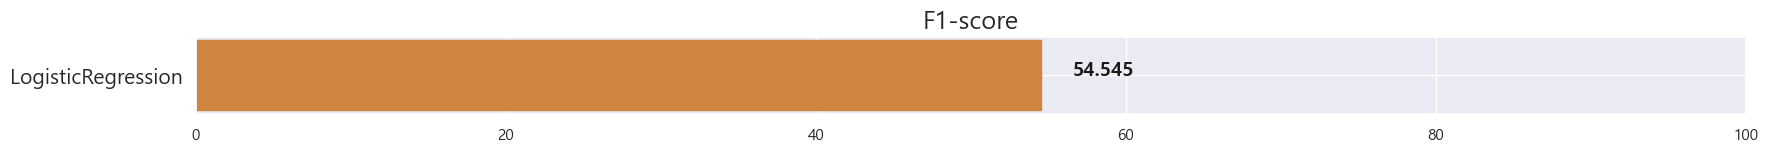

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# LogisticRegression 함수 사용 및 정의 : lg 저장
# 정의된 LogisticRegression 학습 fit() : 입력값으로 X_train, y_train 준다.

lg = LogisticRegression()
lg.fit(X_train, y_train)

# 분류기 성능 평가(score)
lg.score(X_test, y_test)

lg_pred = lg.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, lg_pred)

# 정확도
accuracy_score(y_test, lg_pred)

# 정밀도
precision_score(y_test, lg_pred)

# 재현율
recall_score(y_test, lg_pred)

# 정밀도 + 재현율
f1_score(y_test, lg_pred)

print(classification_report(y_test, lg_pred))

# 위의 함수 사용
# recall_eval('LogisticRegression', lg_pred, y_test)
f1_score_eval('LogisticRegression', lg_pred, y_test)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.80      0.50      0.62         8

    accuracy                           0.87        38
   macro avg       0.84      0.73      0.77        38
weighted avg       0.86      0.87      0.86        38

                    model   f1_score
0  RandomForestClassifier  61.538462
1      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

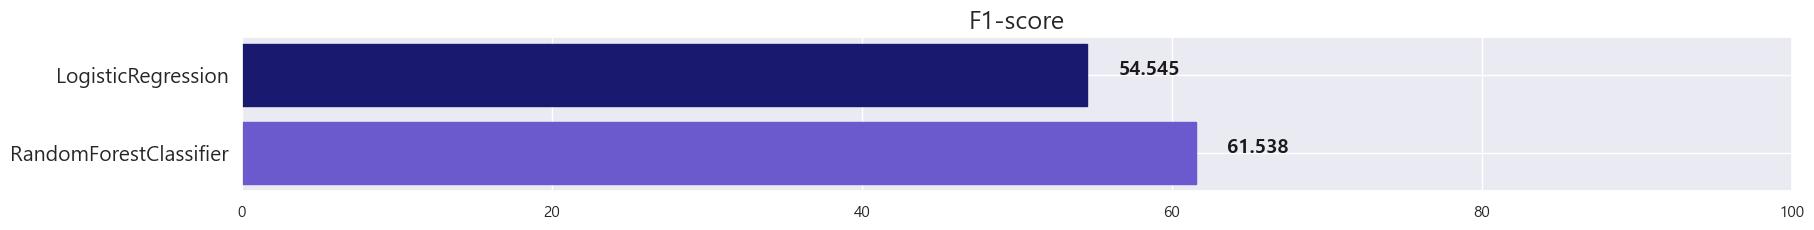

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# 분류기 성능 평가(score)
rf.score(X_test, y_test)

rf_pred = rf.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, rf_pred)

print(classification_report(y_test, rf_pred))

# 위의 함수 사용
f1_score_eval('RandomForestClassifier', rf_pred, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.86      0.75      0.80         8

    accuracy                           0.92        38
   macro avg       0.90      0.86      0.88        38
weighted avg       0.92      0.92      0.92        38

                    model   f1_score
0           XGBClassifier  80.000000
1  RandomForestClassifier  61.538462
2      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

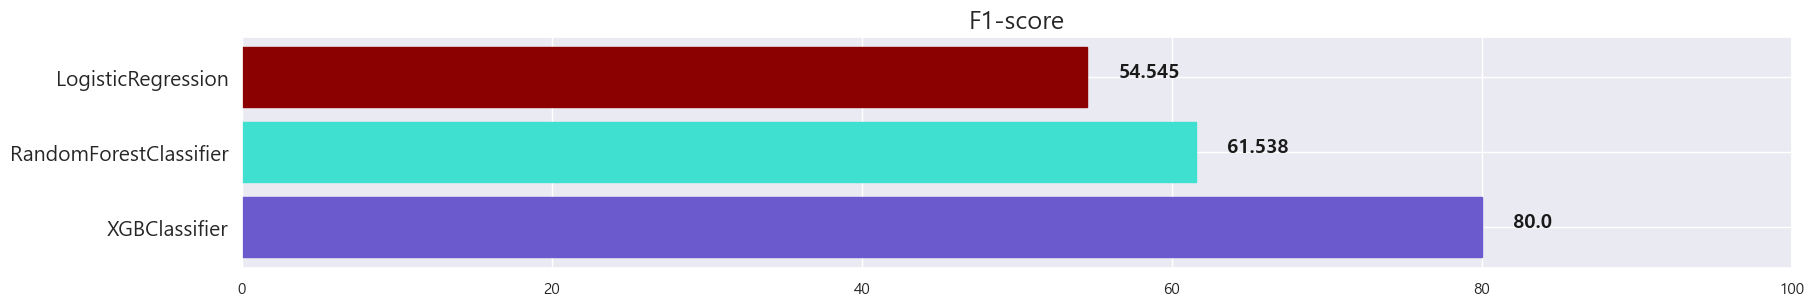

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# 분류기 성능 평가(score)
xgb.score(X_test, y_test)

xgb_pred = xgb.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, xgb_pred)

print(classification_report(y_test, xgb_pred))

# 위의 함수 사용
f1_score_eval('XGBClassifier', xgb_pred, y_test)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
def svc_param(x ,y ,nfolds):
    svm_parameters = [
        {'kernel' : ['rbf'],
         'gamma' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
         'C' : [0.01, 0.1, 1, 10, 100, 1000]
        }
    ]
    clf = GridSearchCV(SVC(),
                      svm_parameters,
                      cv = 10)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    return clf

In [67]:
svc_param(X_train, y_train, 10)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf']}])

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.94      0.96        38
weighted avg       0.97      0.97      0.97        38

                    model   f1_score
0                     SVC  93.333333
1           XGBClassifier  80.000000
2  RandomForestClassifier  61.538462
3      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

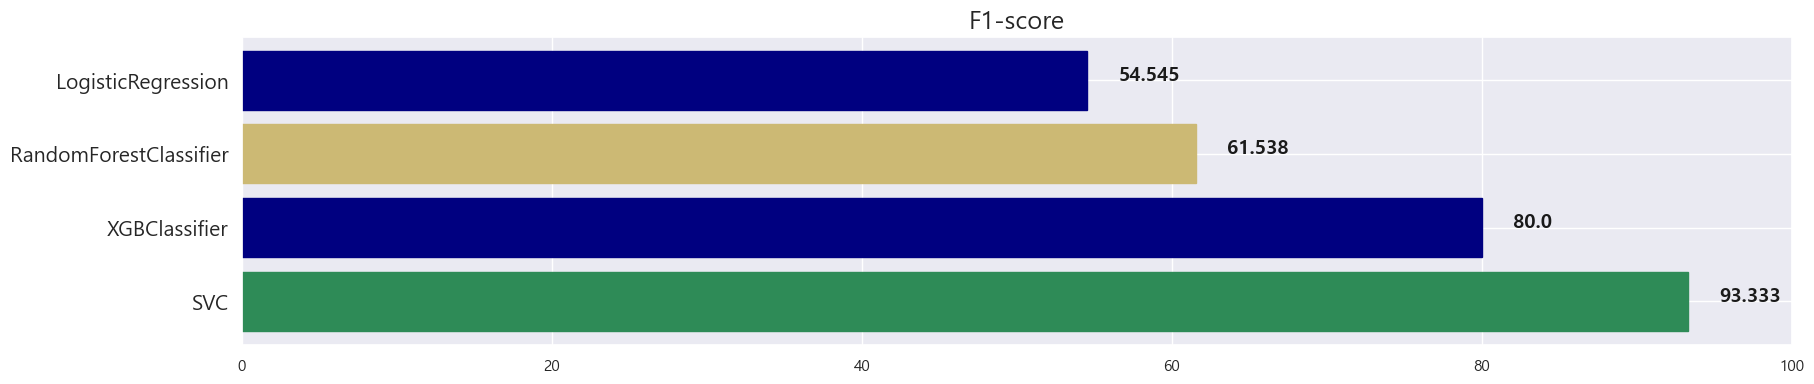

In [68]:
from sklearn.svm import SVC

svc = SVC( C=1.0,
    kernel='rbf',
    degree=3,
    gamma=1)
svc.fit(X_train, y_train)

# 분류기 성능 평가(score)
svc.score(X_test, y_test)

svc_pred = svc.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, svc_pred)

print(classification_report(y_test, svc_pred))

# 위의 함수 사용
f1_score_eval('SVC', svc_pred, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.94      0.96        38
weighted avg       0.97      0.97      0.97        38

                    model   f1_score
0                     SVC  93.333333
1                     KNN  93.333333
2           XGBClassifier  80.000000
3  RandomForestClassifier  61.538462
4      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

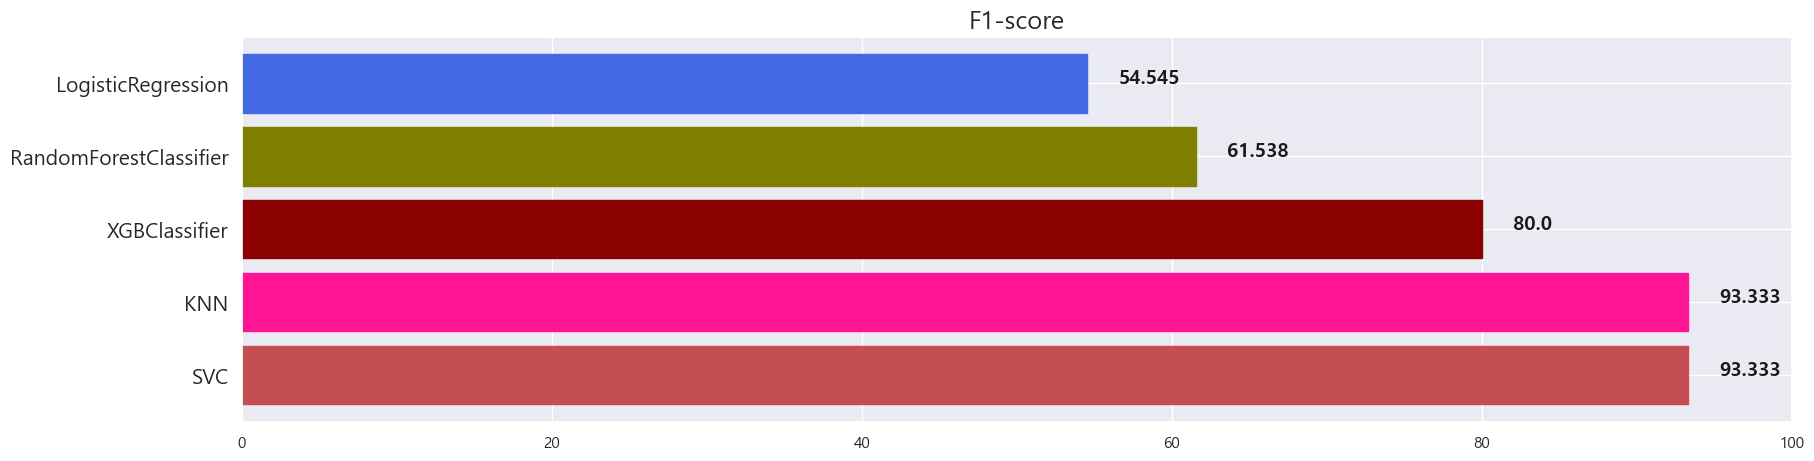

In [69]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

# 분류기 성능 평가(score)
KNN.score(X_test, y_test)

KNN_pred = KNN.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, KNN_pred)

print(classification_report(y_test, KNN_pred))

# 위의 함수 사용
f1_score_eval('KNN', KNN_pred, y_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.88      0.88      0.88         8

    accuracy                           0.95        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.95      0.95      0.95        38

                    model   f1_score
0                     SVC  93.333333
1                     KNN  93.333333
2                     LGB  87.500000
3           XGBClassifier  80.000000
4  RandomForestClassifier  61.538462
5      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

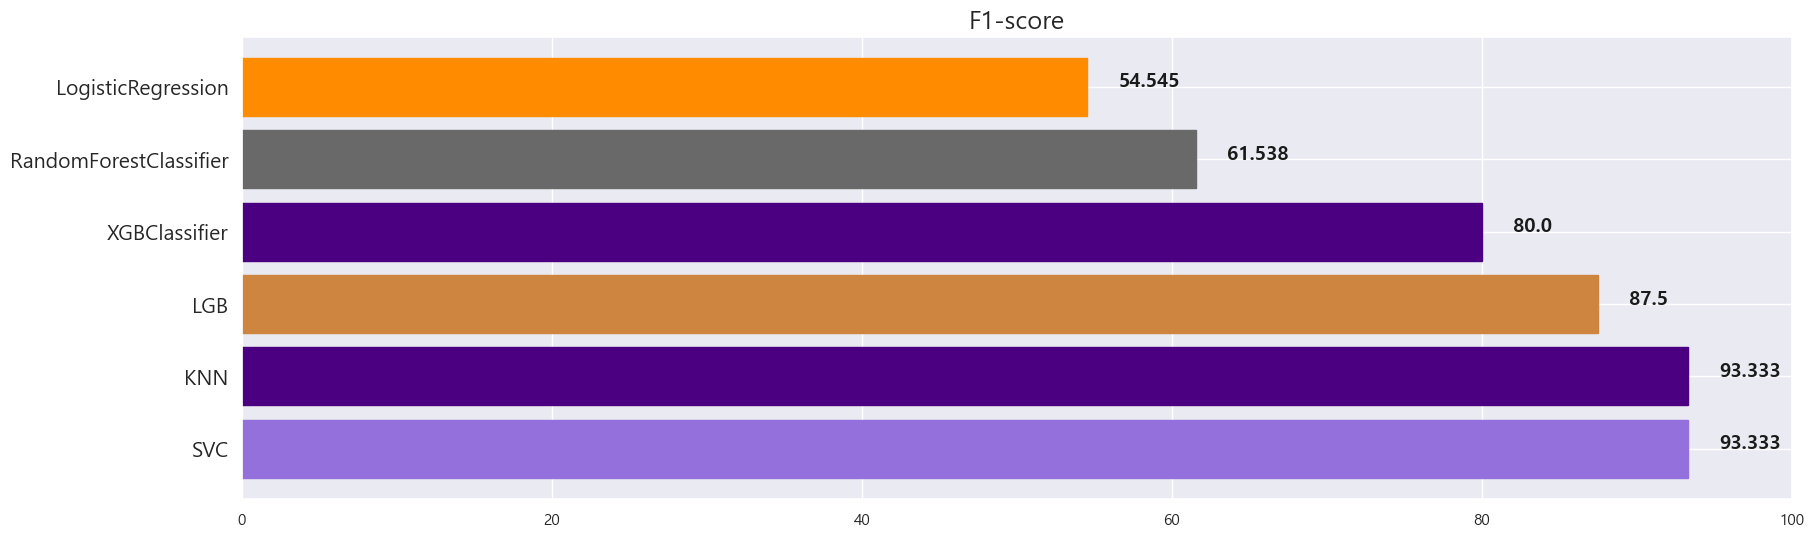

In [70]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

# 분류기 성능 평가(score)
lgb.score(X_test, y_test)

lgb_pred = lgb.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, lgb_pred)

print(classification_report(y_test, lgb_pred))

# 위의 함수 사용
f1_score_eval('LGB', lgb_pred, y_test)

[[29  1]
 [ 1  7]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.88      0.88      0.88         8

    accuracy                           0.95        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.95      0.95      0.95        38



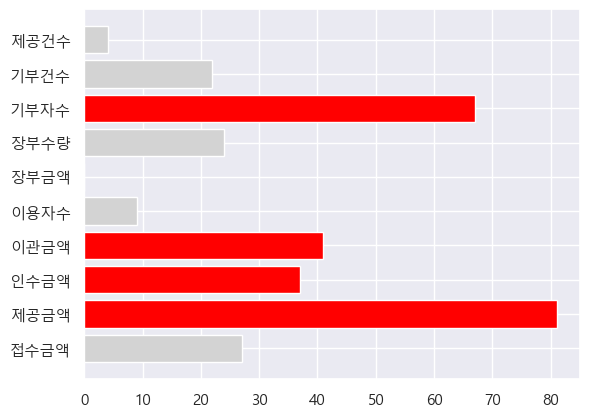

In [71]:
# 선언하기
model = LGBMClassifier()
# 학습하기
model.fit(X_train, y_train)
# 예측하기
y_pred = model.predict(X_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature 중요도 확인
palette = ['#D3D3D3', '#ff0000', '#ff0000', '#ff0000', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#ff0000', '#D3D3D3', '#D3D3D3']
plt.barh(y=list(X), width=model.feature_importances_, color = palette)
plt.show()

In [72]:
data.drop('장부금액', axis = 1, inplace = True)

In [73]:
pca_x = data[['기부자수', '이관금액', '제공금액','인수금액']]
pca_y = data['사업장유형']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, 
                                                    test_size=0.3, 
                                                    stratify=pca_y,
                                                    random_state=42)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.94      0.96        38
weighted avg       0.97      0.97      0.97        38

                    model   f1_score
0                     SVC  93.333333
1                     KNN  93.333333
2                 SVC_PCA  93.333333
3                     LGB  87.500000
4           XGBClassifier  80.000000
5  RandomForestClassifier  61.538462
6      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

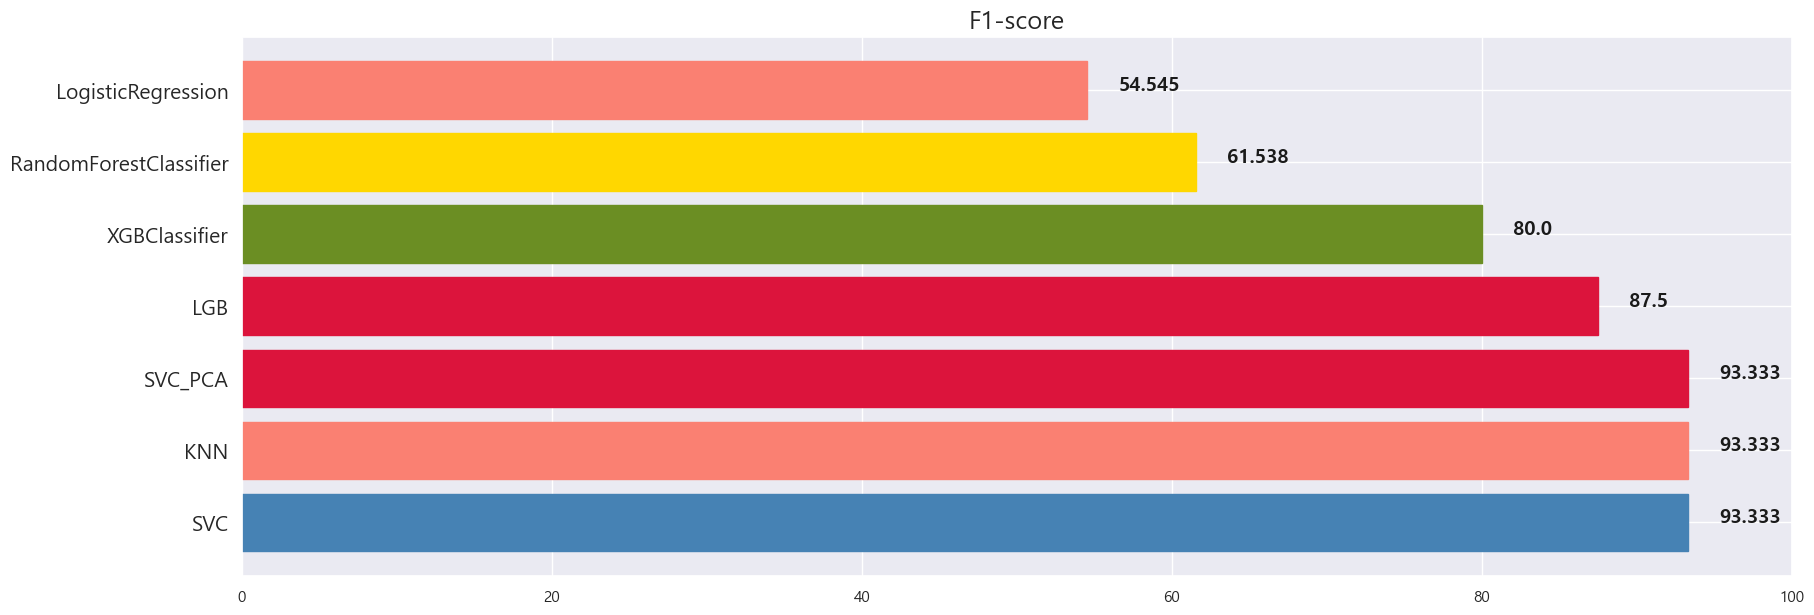

In [76]:
from sklearn.svm import SVC

svc = SVC( C=1.0,
    kernel='rbf',
    degree=3,
    gamma=1,)
svc.fit(X_train, y_train)

# 분류기 성능 평가(score)
svc.score(X_test, y_test)

svc_pred = svc.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, svc_pred)

print(classification_report(y_test, svc_pred))

# 위의 함수 사용
f1_score_eval('SVC_PCA', svc_pred, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.86      0.75      0.80         8

    accuracy                           0.92        38
   macro avg       0.90      0.86      0.88        38
weighted avg       0.92      0.92      0.92        38

                    model   f1_score
0                     SVC  93.333333
1                     KNN  93.333333
2                 SVC_PCA  93.333333
3                     LGB  87.500000
4           XGBClassifier  80.000000
5                 LGB_PCA  80.000000
6  RandomForestClassifier  61.538462
7      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

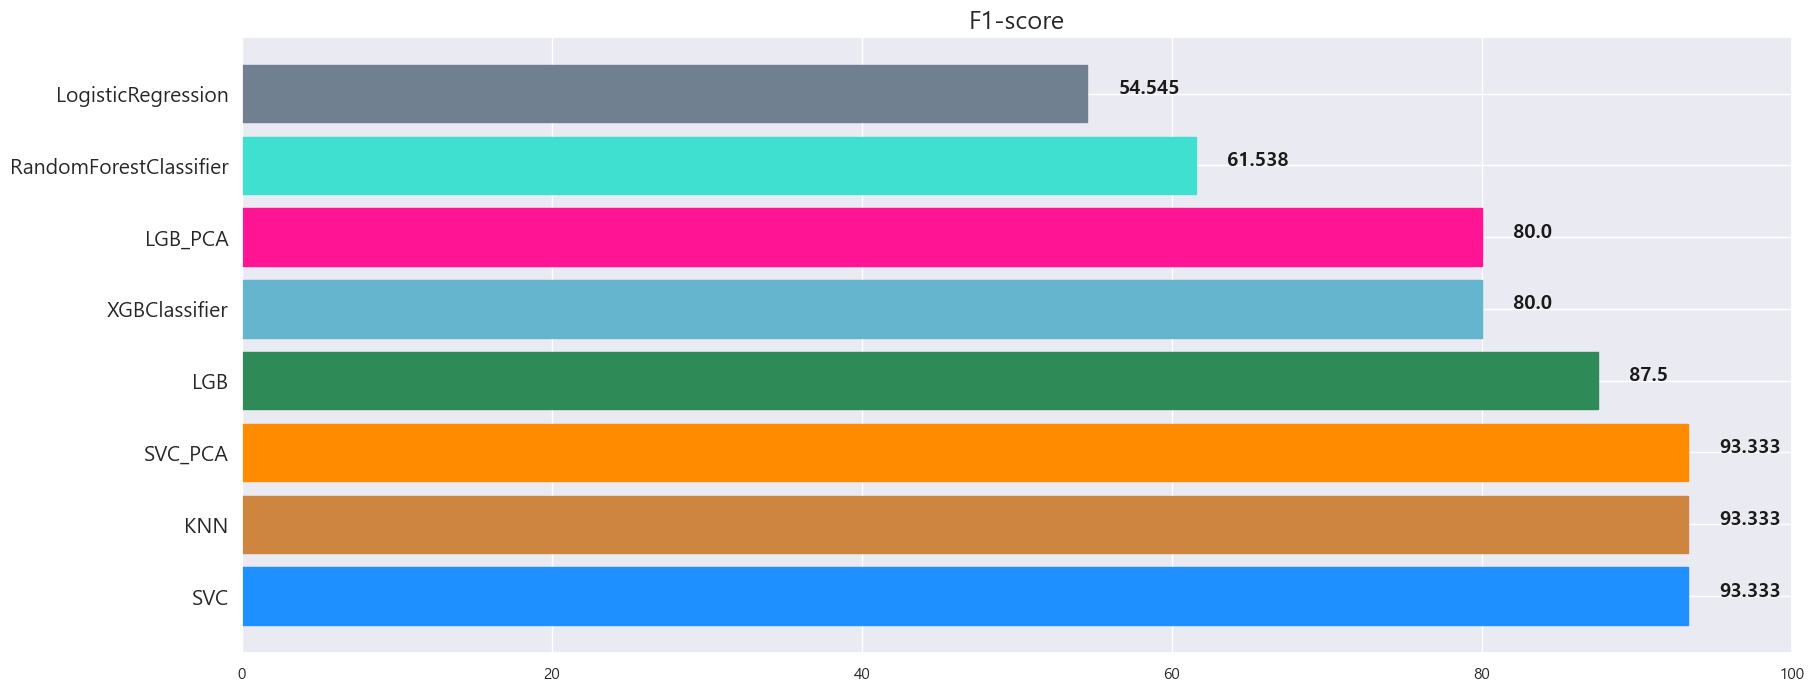

In [77]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

# 분류기 성능 평가(score)
lgb.score(X_test, y_test)

lgb_pred = lgb.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, lgb_pred)

print(classification_report(y_test, lgb_pred))

# 위의 함수 사용
f1_score_eval('LGB_PCA', lgb_pred, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.86      0.75      0.80         8

    accuracy                           0.92        38
   macro avg       0.90      0.86      0.88        38
weighted avg       0.92      0.92      0.92        38

                    model   f1_score
0                     SVC  93.333333
1                     KNN  93.333333
2                 SVC_PCA  93.333333
3                     LGB  87.500000
4           XGBClassifier  80.000000
5                 LGB_PCA  80.000000
6                 KNN_PCA  80.000000
7  RandomForestClassifier  61.538462
8      LogisticRegression  54.545455


<Figure size 2000x1500 with 0 Axes>

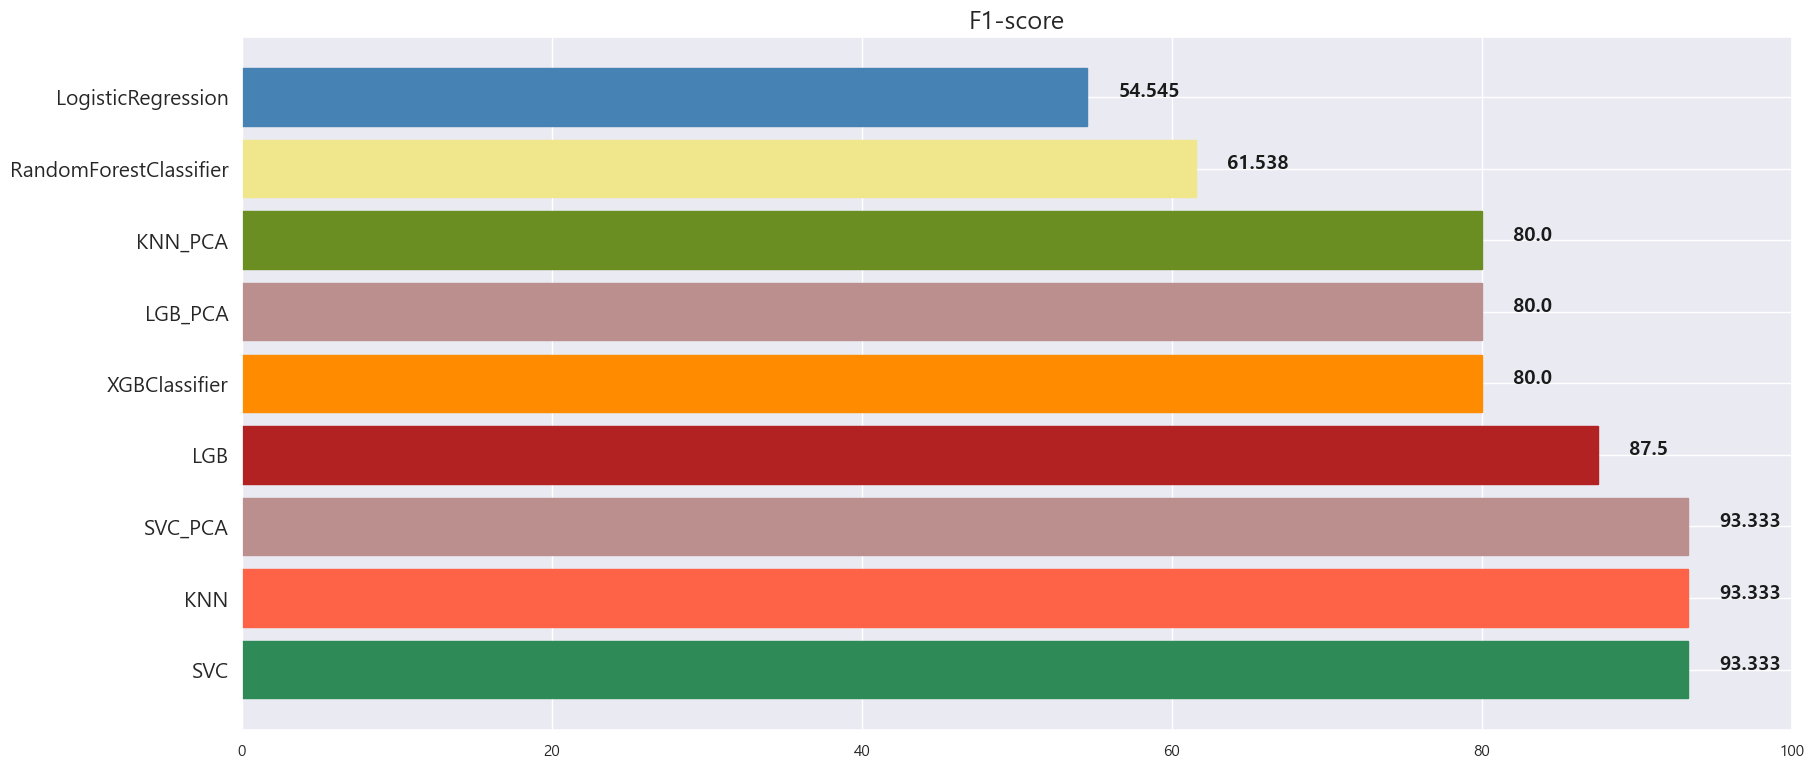

In [78]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)

# 분류기 성능 평가(score)
KNN.score(X_test, y_test)

KNN_pred = KNN.predict(X_test)

# 오차행렬
# TN  FP
# FN  TP
confusion_matrix(y_test, KNN_pred)

print(classification_report(y_test, KNN_pred))

# 위의 함수 사용
f1_score_eval('KNN_PCA', KNN_pred, y_test)

<AxesSubplot:>

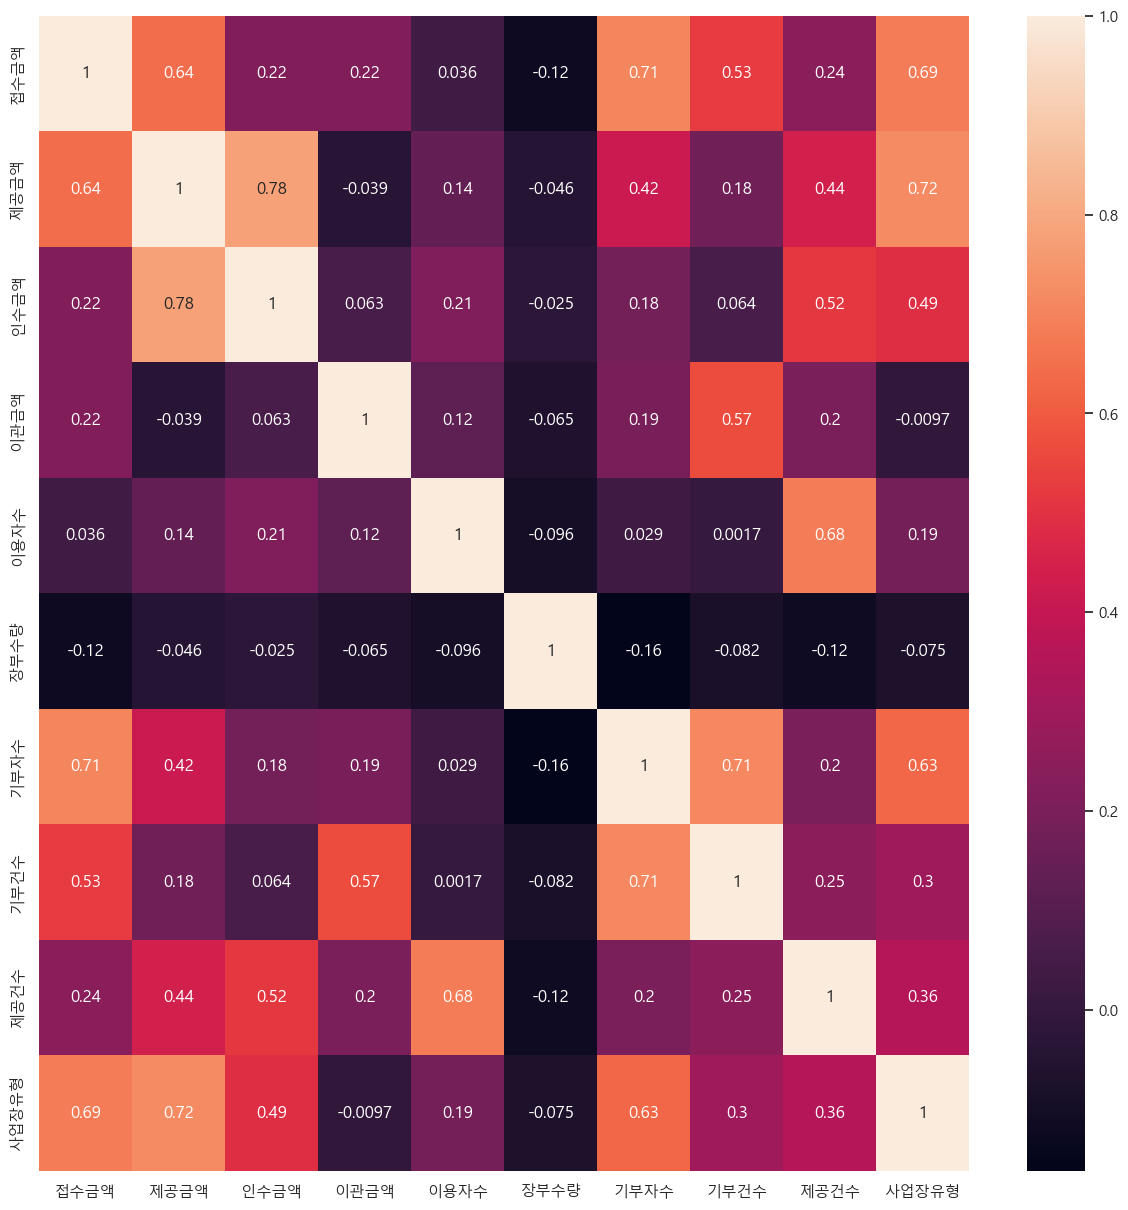

In [79]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)

In [80]:
data

,접수금액,제공금액,인수금액,이관금액,이용자수,장부수량,기부자수,기부건수,제공건수,사업장유형
0,15793689.0,11343949.0,83229216,0,402,3436,69,257,2013,0
1,15541100.0,298169210.3,244801019,0,3056,4614,16,28,6325,0
2,22418200.0,296911934.2,403720010,29574802,3047,11805,17,45,6000,0
3,36664120.0,299588655.2,286793058,1276000,2645,20718,30,62,8461,0
4,170673867.0,174608378.4,93608722,0,2815,70375,206,1948,25289,0
...,...,...,...,...,...,...,...,...,...,...
120,423550224.0,413706176.5,86349843,49375954,7875,105002,217,803,30636,1
121,251652753.0,299552303.0,47899536,0,985,137557,162,3197,10156,1
122,369710065.0,407069506.7,46655561,9296136,1184,174470,224,4793,16249,1
123,542049942.0,667062331.4,139893506,10900000,327,175586,278,4876,5969,1


<AxesSubplot:xlabel='접수금액', ylabel='제공금액'>

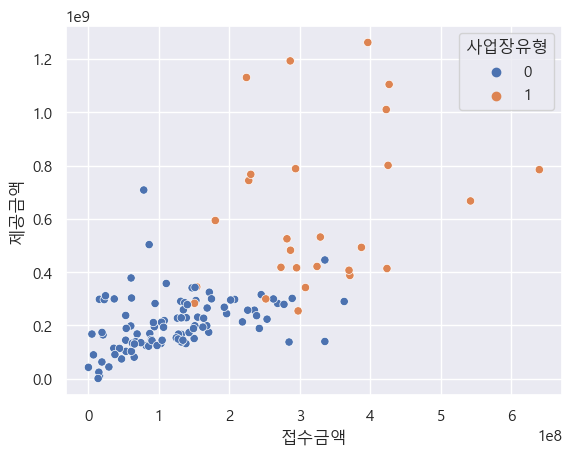

In [82]:
sns.scatterplot(x = data['기부자수'], y = data['제공금액'], hue = data['사업장유형'])

<AxesSubplot:xlabel='기부자수', ylabel='제공금액'>

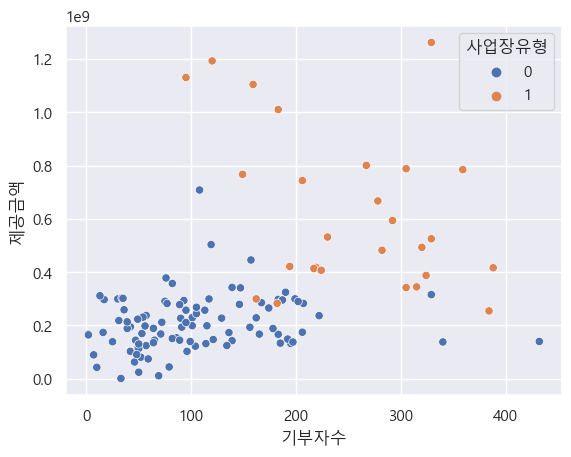

In [84]:
sns.scatterplot(x = data['기부자수'], y = data['제공금액'], hue = data['사업장유형'])